# Read the data set

In [198]:
import pandas as pd # type: ignore
df = pd.read_csv('Titanic-Dataset.csv')

In [199]:
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Data set information

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [201]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [202]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

# Checking for nulls

In [203]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

# Drop irrelevant Columns 

In [204]:
df = df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)

# Replace Missing Values or Nulls

In [205]:
import warnings
warnings.simplefilter("ignore")
median_age  = df['Age'].median()
df['Age'].fillna(median_age,inplace = True)
 

In [206]:
df['Embarked'].fillna(df['Embarked'].mode,inplace = True)

# Drop Duplicates

In [207]:
df.drop_duplicates()
df.dropna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,28.0,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [208]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [209]:
import pandas as pd # type: ignore

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

remove_outliers(df,['Age','Fare'])

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
5,3,male,28.0,0,0,8.4583,Q,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,28.0,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [210]:
df['Embarked'].value_counts()

Embarked
S                                                                                                                                                                                         644
C                                                                                                                                                                                         168
Q                                                                                                                                                                                          77
<bound method Series.mode of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object>      2
Name: count, dtype: int64

## Encoding Categorical Variables

In [211]:
from sklearn.preprocessing import LabelEncoder # type: ignore
df['Embarked'] = df['Embarked'].astype(str)

# # Apply LabelEncoder
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
 

# Splitting the data set into traint and test data

In [212]:
# split X and y into training and
from sklearn.model_selection import train_test_split # type: ignore


X = df.drop(['Survived'], axis=1)
y = df['Survived'] # Target Column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
537,1,0,30.0,0,0,106.4250,1
401,3,1,26.0,0,0,8.0500,3
554,3,0,22.0,0,0,7.7750,3
213,2,1,30.0,0,0,13.0000,3
434,1,1,50.0,1,0,55.9000,3
...,...,...,...,...,...,...,...
360,3,1,40.0,1,4,27.9000,3
709,3,1,28.0,1,1,15.2458,1
439,2,1,31.0,0,0,10.5000,3
174,1,1,56.0,0,0,30.6958,1


# Feature Scaling

In [213]:
#z=(x-u)/s
from sklearn.preprocessing import StandardScaler # type: ignore
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [214]:
df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.173511,-0.338481
Sex,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.118492,-0.543351
Age,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.031903,-0.064910
SibSp,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.071480,-0.035322
Parch,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.043351,0.081629
Fare,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.230365,0.257307
Embarked,0.173511,0.118492,-0.031903,0.071480,0.043351,-0.230365,1.000000,-0.176509
Survived,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.176509,1.000000


# Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression # type: ignore

log_Reg = LogisticRegression(random_state = 0).fit(X_train,y_train)

log_Reg.predict(X_train)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [216]:
#accuracy of predicting the train data
log_Reg.score(X_train,y_train)

0.7817014446227929

In [217]:
#accuracy of predicting the test data
log_Reg_Accuracy = log_Reg.score(X_test,y_test)
log_Reg_Accuracy

0.8246268656716418

#### Classification report

In [218]:
y_pred = log_Reg.predict(X_test)

# Calculate accuracy on test data
test_accuracy = log_Reg.score(X_test, y_test)
print('Test set accuracy: {:.4f}'.format(test_accuracy))

# Generate classification report for test data
report = classification_report(y_test, y_pred) # type: ignore
print("\nClassification Report:")
print(report)

Test set accuracy: 0.8246

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.83      0.82      0.83       268



# KNN

In [219]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier # type: ignore

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)
# fit the model to the training set
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [220]:
y_pred = knn.predict(X_test)

y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [221]:
from sklearn.metrics import accuracy_score # type: ignore

KNN_Accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8396


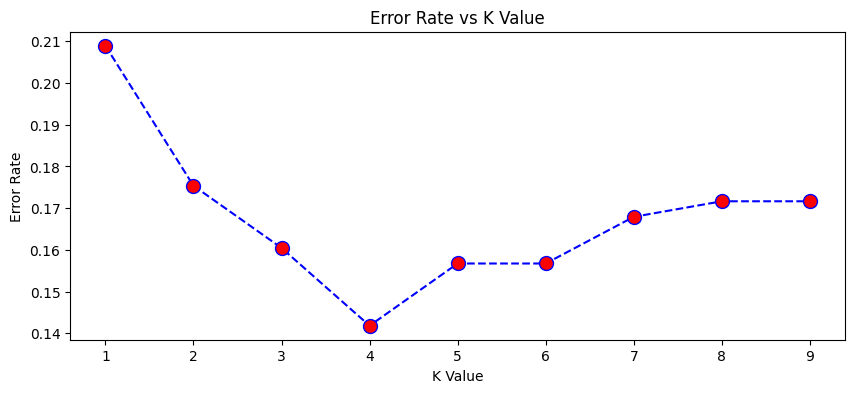

In [222]:
import matplotlib.pyplot as plt  # type: ignore # Ensure the correct import
import numpy as np # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# To find the best k
error_rate = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

# Plotting the error rate vs K value
plt.figure(figsize=(10, 4))  # This should now correctly create a figure
plt.plot(range(1, 10), error_rate, color="blue", ls="--", marker="o", markersize=10, markerfacecolor="red")
plt.title("Error Rate vs K Value")
plt.ylabel("Error Rate")
plt.xlabel("K Value")
plt.show()



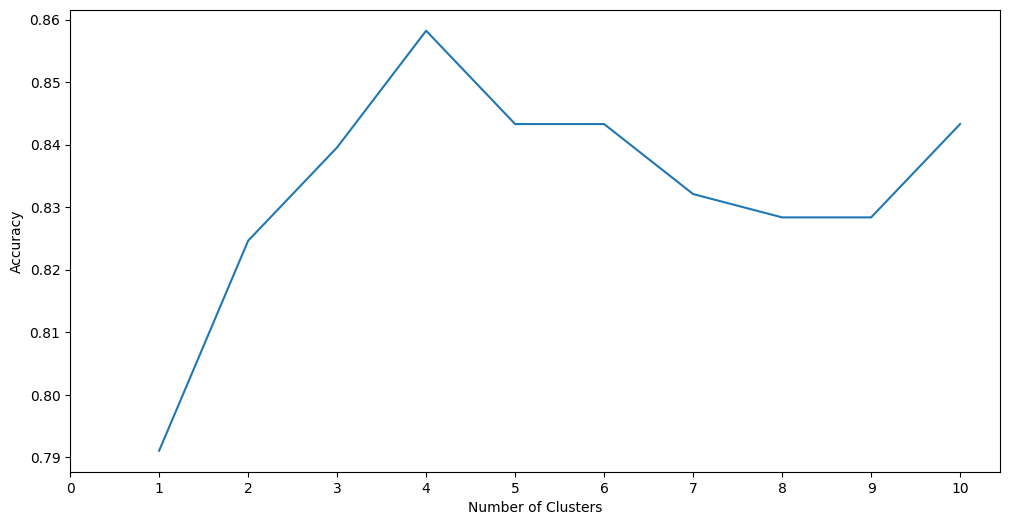

Accuracies for different values of n are: [0.79104478 0.82462687 0.83955224 0.85820896 0.84328358 0.84328358
 0.83208955 0.82835821 0.82835821 0.84328358] with the max value as  0.8582089552238806


In [223]:
from sklearn import metrics  # type: ignore # Import metrics for accuracy_score
from sklearn.model_selection import train_test_split  # type: ignore # Ensure you have this if you split your data
a_index = list(range(1, 11))
a = []
x = list(range(11))
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    a.append(metrics.accuracy_score(prediction, y_test))

a = pd.Series(a)
plt.plot(a_index, a)
plt.xticks(x)
plt.xlabel('Number of Clusters')  # Set x-axis label
plt.ylabel('Accuracy')  # Set y-axis label
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.max())


#### Classification report

In [224]:
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report # type: ignore
y_pred = knn.predict(X_test)
# Calculate confusion matrix
# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       178
           1       0.79      0.67      0.72        90

    accuracy                           0.83       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.83      0.83      0.82       268



# Naive Bayes

## Model training


In [225]:
from sklearn.naive_bayes import GaussianNB # type: ignore
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

## Predict the results


In [226]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

## Check accuracy score


In [227]:
Naive_Bayes_Accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.7910


## Check for overfitting and underfitting


In [228]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training set score: 0.7897
Test set score: 0.7910


#### Classification Report

In [229]:
y_pred = gnb.predict(X_test)

# Calculate the accuracy score
Naive_Bayes_Accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes Model accuracy score: {0:0.4f}'.format(Naive_Bayes_Accuracy))

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Naive Bayes Model accuracy score: 0.7910

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       178
           1       0.67      0.73      0.70        90

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.80      0.79      0.79       268



# SVM

In [230]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC # type: ignore

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

# Predicting the result and giving the accuracy
SVM_Accuracy = classifier.score(X_test, y_test)

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.8315
Test set score: 0.8582


#### classification report

In [231]:
y_pred = classifier.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       178
           1       0.86      0.69      0.77        90

    accuracy                           0.86       268
   macro avg       0.86      0.82      0.83       268
weighted avg       0.86      0.86      0.85       268



# Decision Tree

In [232]:
from sklearn import tree

# Initialize the Decision Tree Classifier with regularization parameters
model = tree.DecisionTreeClassifier(
    max_depth=10,           # Limit the maximum depth of the tree
    min_samples_split=10,   # The minimum number of samples required to split an internal node
    min_samples_leaf=5,     # The minimum number of samples required to be at a leaf node
    max_leaf_nodes=50,      # Limit the number of leaf nodes
    max_features='sqrt'     # Consider a random subset of features at each split
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the training set score
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

# Print the test set score
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

DT_Accuracy = model.score(X_test, y_test)
# Make predictions on the test data
predictions = model.predict(X_test)



Training set score: 0.8347
Test set score: 0.8246


#### Classification report

In [233]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       178
           1       0.83      0.60      0.70        90

    accuracy                           0.82       268
   macro avg       0.83      0.77      0.79       268
weighted avg       0.83      0.82      0.82       268



In [234]:
import plotly.graph_objects as go
fig = go.Figure()

Algorithms = ['Naive Bayes', 'SVM', 'KNN', 'Logistic Regression',"Decision Tree"]
Accuracy = [Naive_Bayes_Accuracy, SVM_Accuracy, KNN_Accuracy, log_Reg_Accuracy,DT_Accuracy]

# Add bar trace
fig.add_trace(go.Bar(x=Algorithms, y=Accuracy, name='Accuracy'))



fig.show()

# Visualizing data

In [235]:
df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.173511,-0.338481
Sex,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.118492,-0.543351
Age,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.031903,-0.064910
SibSp,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.071480,-0.035322
Parch,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.043351,0.081629
Fare,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.230365,0.257307
Embarked,0.173511,0.118492,-0.031903,0.071480,0.043351,-0.230365,1.000000,-0.176509
Survived,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.176509,1.000000


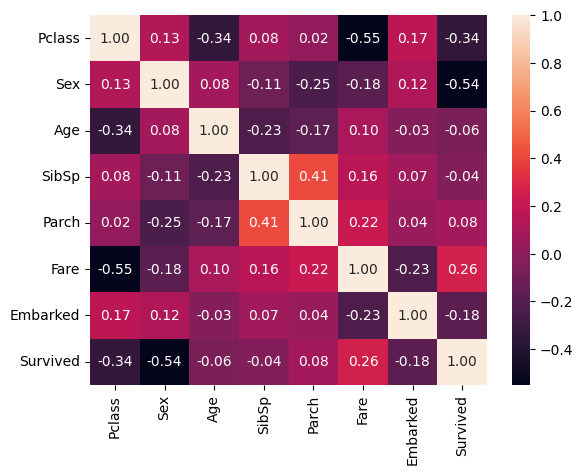

In [236]:
import seaborn as sns # type: ignore
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()


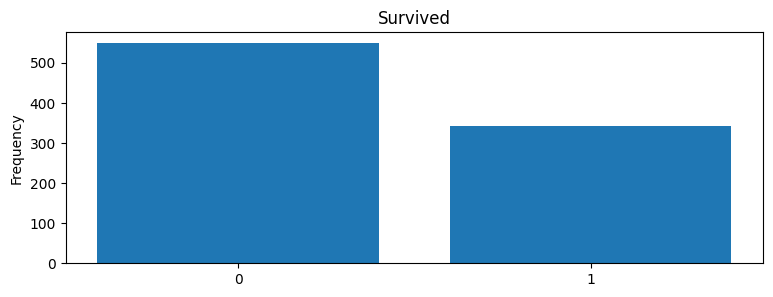

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


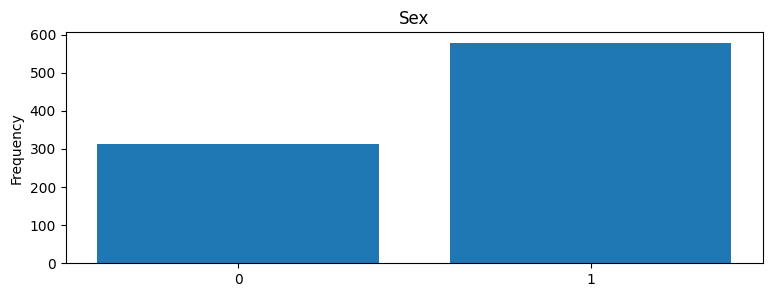

Sex: 
 Sex
1    577
0    314
Name: count, dtype: int64


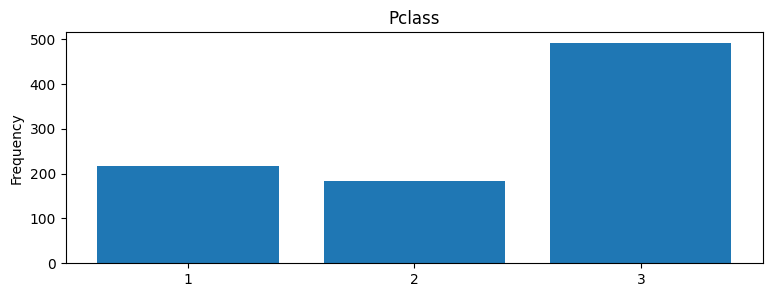

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


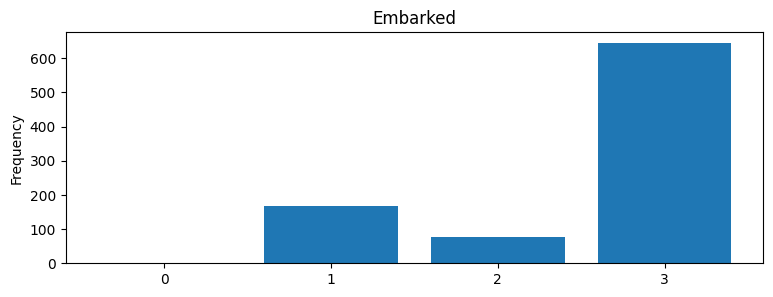

Embarked: 
 Embarked
3    644
1    168
2     77
0      2
Name: count, dtype: int64


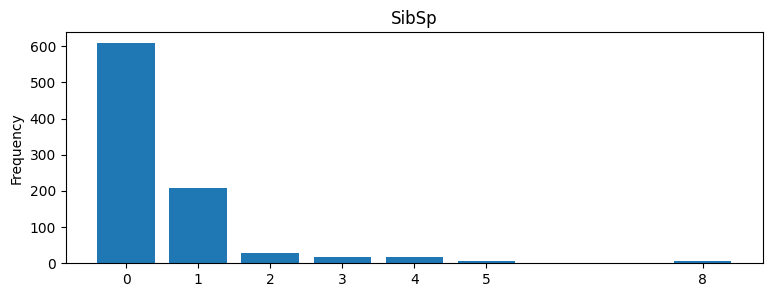

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


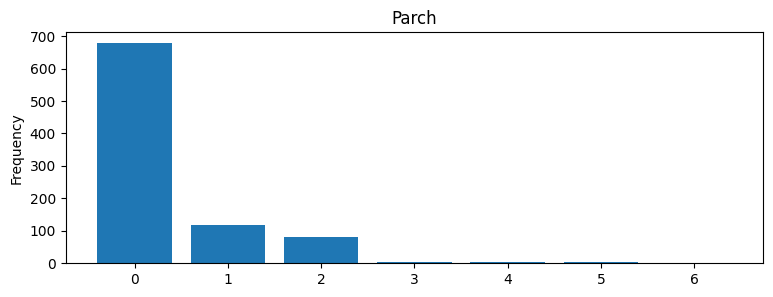

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [237]:
def bar_plot(variable):
 # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

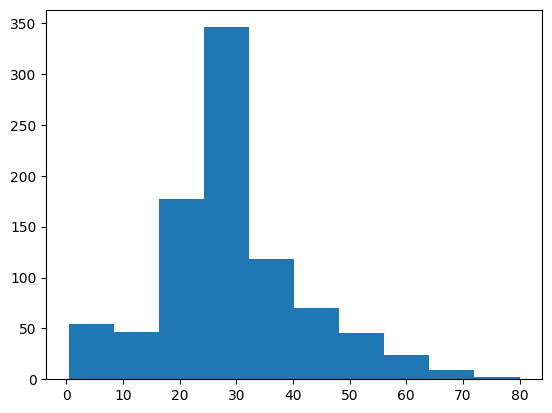

In [238]:
plt.hist(df['Age'])